In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [10]:
from TileEM_plot_toolbox import *
from qualityBaseline import *

In [8]:
my_BBG  = pd.read_csv("my_ground_truth.csv")
object_lst = list(object_tbl.id)
objid=12
ground_truth_match = my_BBG[my_BBG.object_id==objid]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))

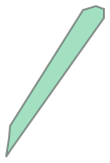

In [9]:
BBG

In [ ]:
def precision(obj_x_locs,obj_y_locs):
    worker_bb = Polygon(zip(obj_x_locs[0],obj_y_locs[0]))
    worker_bb_area  = worker_bb.area

# Summarization-Based Method 

In [21]:
df = pd.read_csv("../computed_my_COCO_BBvals.csv",index_col=0)

In [23]:
df_noBBG = df[df["worker_id"]!=3]

In [38]:
# select object with highest Num Points 
attr="Num Points"
idx = df_noBBG.groupby("object_id")[attr].transform(max) == df_noBBG[attr]

In [41]:
best_BBs = df_noBBG[idx] #best BBs based on these metrics

In [43]:
from collections import OrderedDict

In [52]:
p_lst = []
r_lst = []

In [53]:
for bb in tqdm(list(best_BBs.iterrows())):
    objid = bb[1]["object_id"]
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])

    bbx_path= bb[1]["x_locs"]
    bby_path= bb[1]["y_locs"]
    worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
    worker_x_locs,worker_y_locs = zip(*list(OrderedDict.fromkeys(zip(worker_x_locs,worker_y_locs))))
    
    p_lst.append(precision([worker_x_locs,x_locs],[worker_y_locs,y_locs]))
    r_lst.append(recall([worker_x_locs,x_locs],[worker_y_locs,y_locs]))

In [55]:
best_BBs["Precision"] = p_lst

In [56]:
best_BBs["Recall"] = r_lst